In [131]:
!pip install pyclustering
!pip install openpyxl

## UC Irvine Machile Learning Repository: Online Retail  
- source: https://archive.ics.uci.edu/dataset/352/online+retail
- github repository:

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

Dataset Information

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
Has Missing Values?
No

## Import Library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Dataset Selection

In [6]:
# Load dataset
raw_online_retail = pd.read_csv('content/online_retail.csv', low_memory=False,skiprows=1)

In [7]:
raw_online_retail.shape

(541909, 8)

In [8]:
raw_online_retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom


## Data Cleaning

In [9]:
# Check duplicated rows
len(raw_online_retail[raw_online_retail.duplicated])

5268

In [10]:
# Delete duplicate rows 
online_retail_2_miss=raw_online_retail.drop_duplicates(keep='last',inplace=False) 

In [11]:
n_rows, n_cols = online_retail_2_miss.shape
print(n_rows, n_cols)

536641 8


In [12]:
# Check for missing values
print(online_retail_2_miss.isna().values.any())
print(online_retail_2_miss.isnull().values.any())

True
True


In [13]:
online_retail_2_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [14]:
# Handle missing values
online_retail_1_miss = online_retail_2_miss.drop('CustomerID',axis=1,inplace=False)
online_retail_1_miss.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,United Kingdom


In [15]:
# Check missing values percetage 
n_missing=online_retail_1_miss['Description'].isnull().sum()
print('Missing fields in Description column:',round((n_missing*100)/n_rows,2),'%')

Missing fields in Description column: 0.27 %


In [16]:
# Handle missing values
online_retail = online_retail_1_miss.dropna(subset=['Description'],inplace=False)

In [17]:
# Standardize numerical features
scaler = StandardScaler()
online_retail_scaled = scaler.fit_transform(online_retail.select_dtypes(include=[np.number]))

## Data Preprocessing
### Dimensionality Reduction

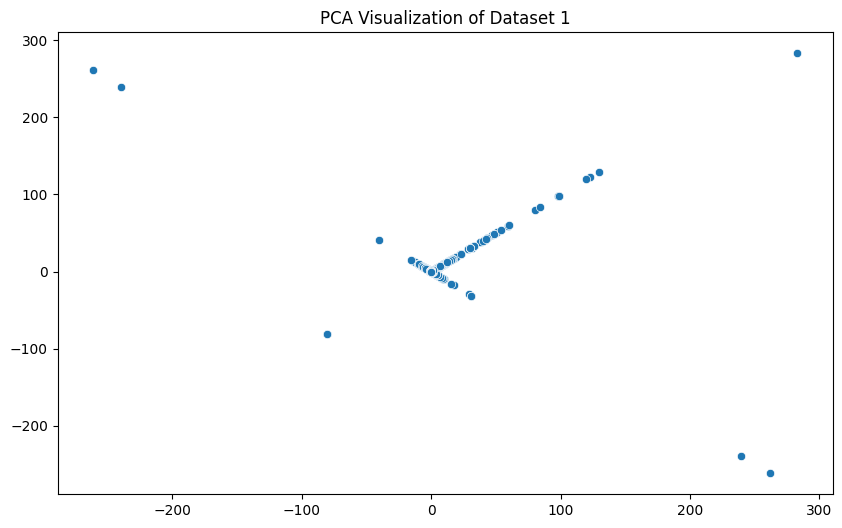

In [18]:
#Dimensionality Reduction using PCA
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(online_retail_scaled)

# Visualize Dataset_1 PCA Results
plt.figure(figsize=(10,6))
sns.scatterplot(x=df1_pca[:, 0], y=df1_pca[:, 1])
plt.title("PCA Visualization of Dataset 1")
plt.show()

## Clustering Implementation